## Load packages 
We load the packages used for the analysis

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import glob 
from keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os 
from sklearn import preprocessing
import seaborn as sns
import tensorflow as tf
for dirname, _, filenames in os.walk('/kaggle/input'):
     print(dirname, "contains", len(filenames), "files.")
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate contains 1 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test/EGL contains 270 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test/ML contains 270 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train/EGL contains 1080 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train/ML contains 1080 files.


## Load data


In [50]:
train_data = '/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train'
test_data = '/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test'
batch_size = 64
img_height = 300
img_width = 300

## Split train data
spliting train data into **train** and **validation** with 80:20 ratio

In [51]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
    brightness_range=[0.2,0.8],                         
    horizontal_flip=True,
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_data,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    train_data,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)


Found 1728 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


## Add layers 

In [65]:
activation = 'relu'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(16, 3, activation = activation, padding = 'same', input_shape = (300, 300, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(16, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(2,2))
feature_extractor.add(Dropout(0.2))

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(2,2))
feature_extractor.add(Dropout(0.2))

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(2,2))
feature_extractor.add(Dropout(0.2))

feature_extractor.add(Conv2D(128, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(2,2))
feature_extractor.add(Dropout(0.2))
feature_extractor.add(Flatten())

x = feature_extractor.output 
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = activation, kernel_initializer = 'he_uniform')(x)
x = Dropout(0.2)(x)
prediction_layer = Dense(2, activation = 'softmax')(x)

## Add dense layer 

In [66]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125_input (InputLayer [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 300, 300, 16)      448       
_________________________________________________________________
batch_normalization_74 (Batc (None, 300, 300, 16)      64        
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 300, 300, 16)      2320      
_________________________________________________________________
batch_normalization_75 (Batc (None, 300, 300, 16)      64        
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 150, 150, 16)      0   

## Train cnn model 

In [67]:
history = cnn_model.fit(train_generator ,validation_data=validation_generator, epochs=30)

Epoch 1/30
54/54 [==============================] - 21s 343ms/step - loss: 48.5216 - accuracy: 0.6269 - val_loss: 42.4975 - val_accuracy: 0.5000
Epoch 2/30
54/54 [==============================] - 18s 332ms/step - loss: 0.6133 - accuracy: 0.7478 - val_loss: 67.2763 - val_accuracy: 0.5000
Epoch 3/30
54/54 [==============================] - 18s 337ms/step - loss: 0.5739 - accuracy: 0.8152 - val_loss: 116.6011 - val_accuracy: 0.5000
Epoch 4/30
14/54 [======>.......................] - ETA: 10s - loss: 0.3842 - accuracy: 0.8714

KeyboardInterrupt: 

## Shows the train and validation loss 

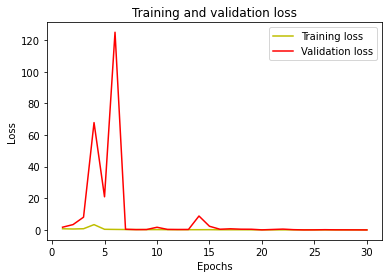

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()